<a href="https://colab.research.google.com/github/FilippMaksimov/SPbSU.Series/blob/main/Maksimov_F_Series_Lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [ ]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")

Визуализация графиков

In [ ]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

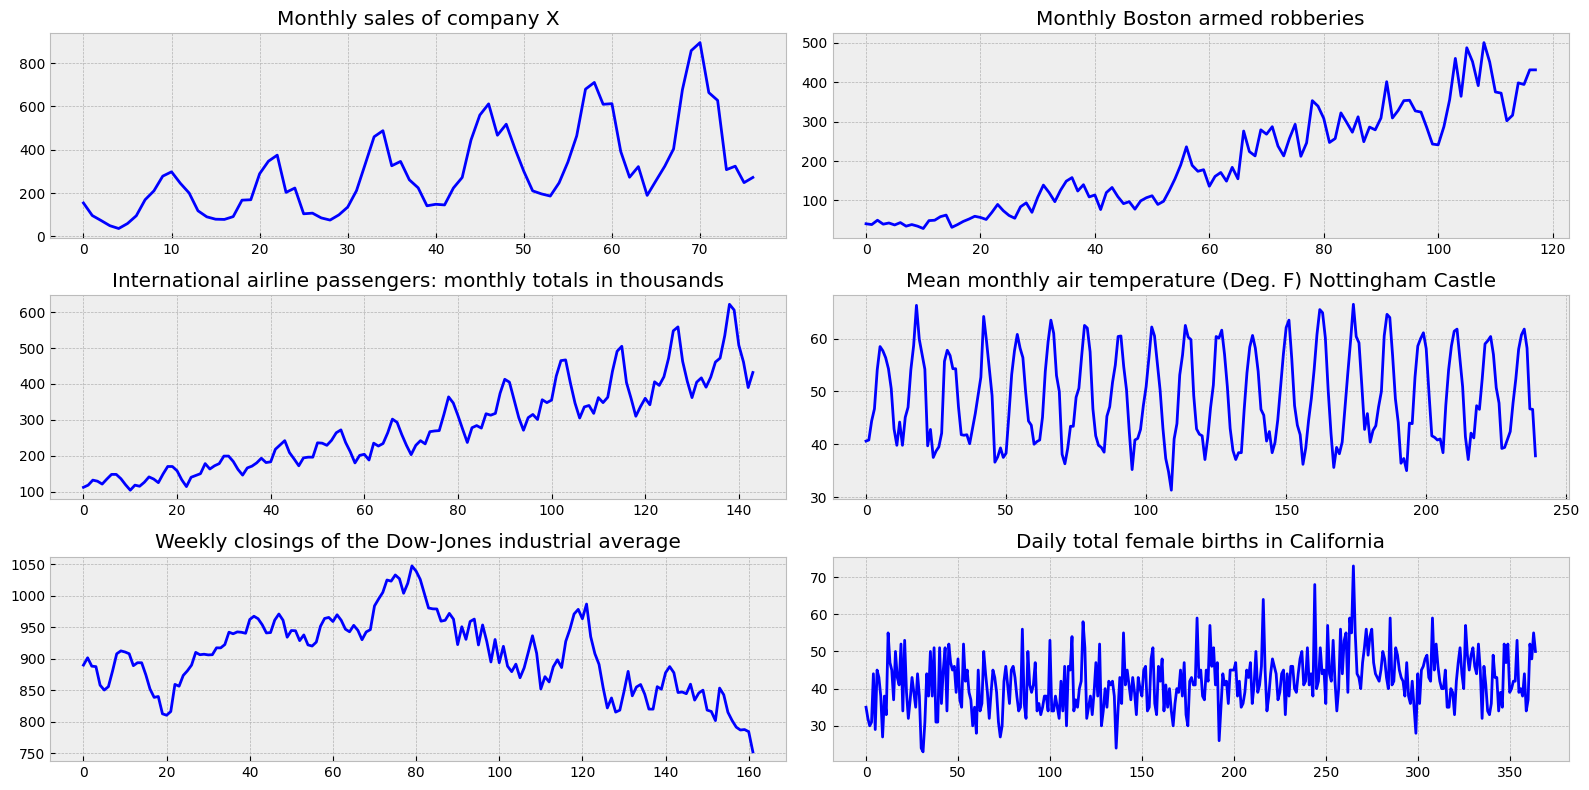

In [ ]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

Проверим ряды на стационарность путем тестов Дики-Фуллера (уровень значимости $\alpha$ = 0.05 ) и графиков коррелограмм

In [ ]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [ ]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
        plt.show()
    return

for Monthly sales of company X
Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


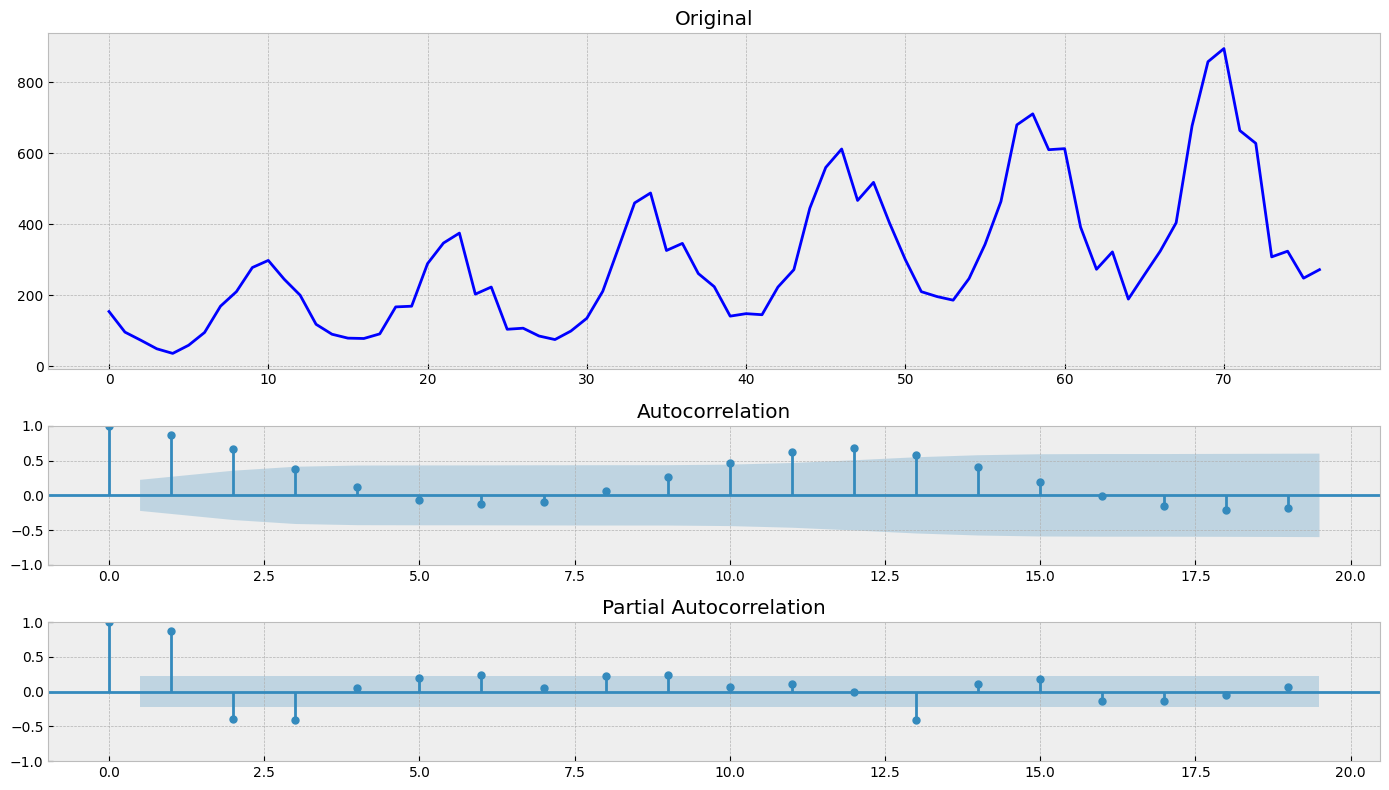

for Monthly Boston armed robberies
Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


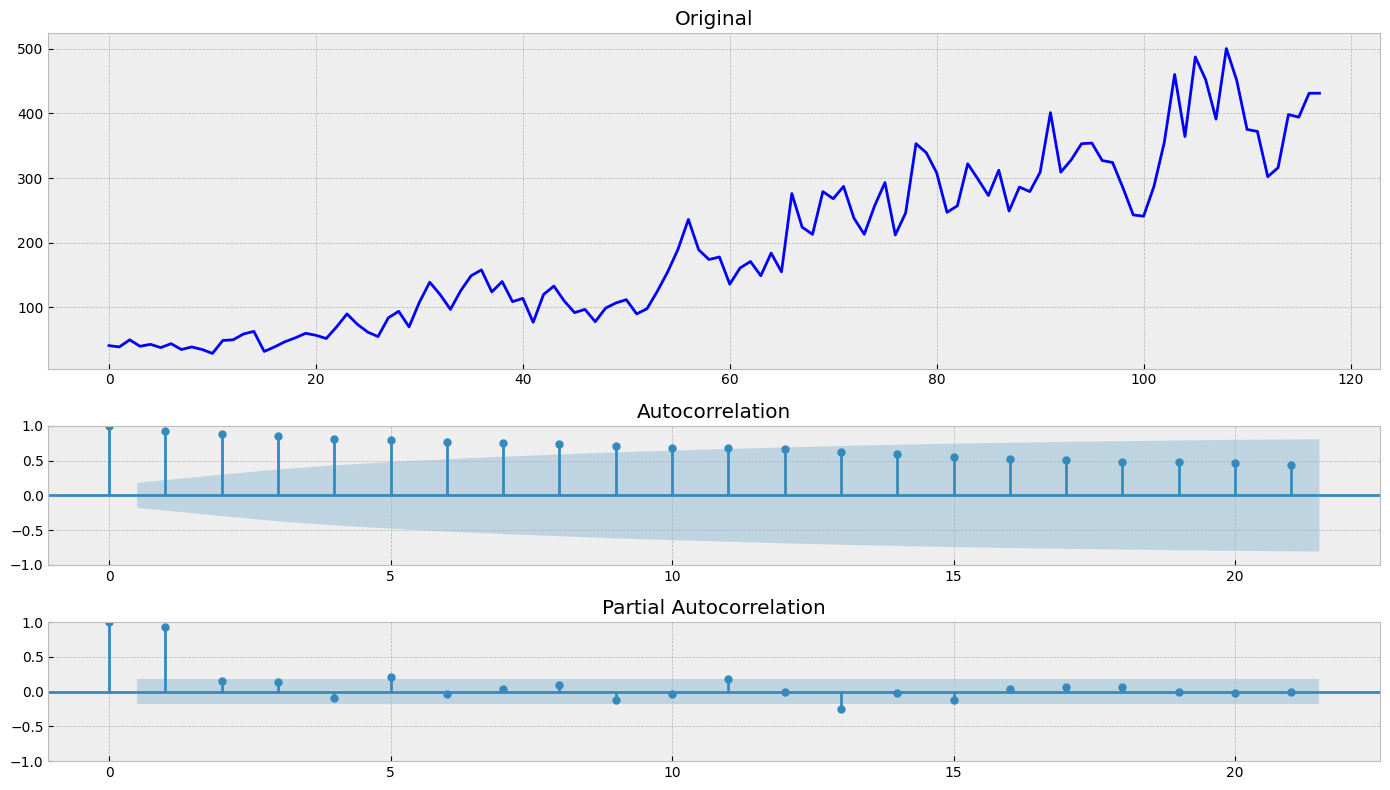

for International airline passengers: monthly totals in thousands
Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


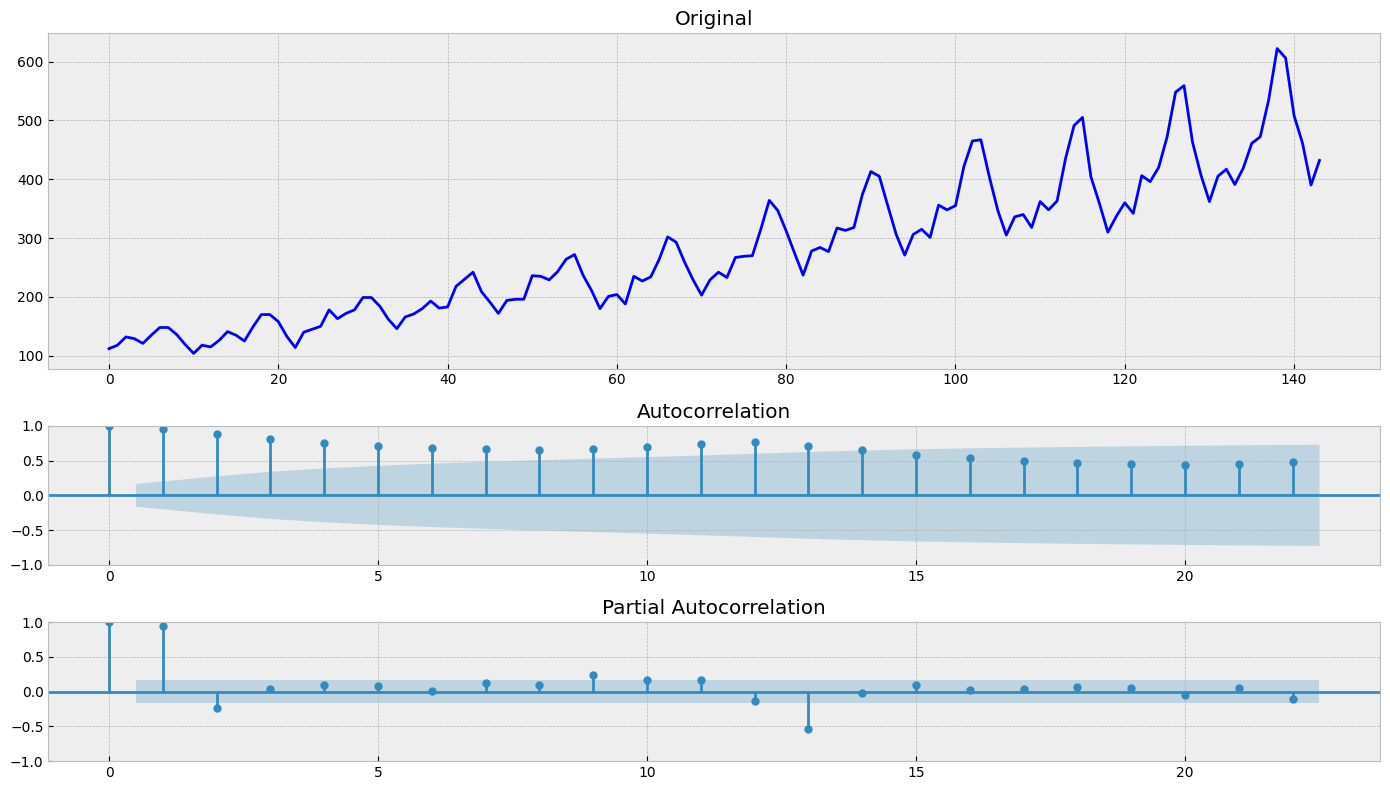

for Mean monthly air temperature (Deg. F) Nottingham Castle
Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


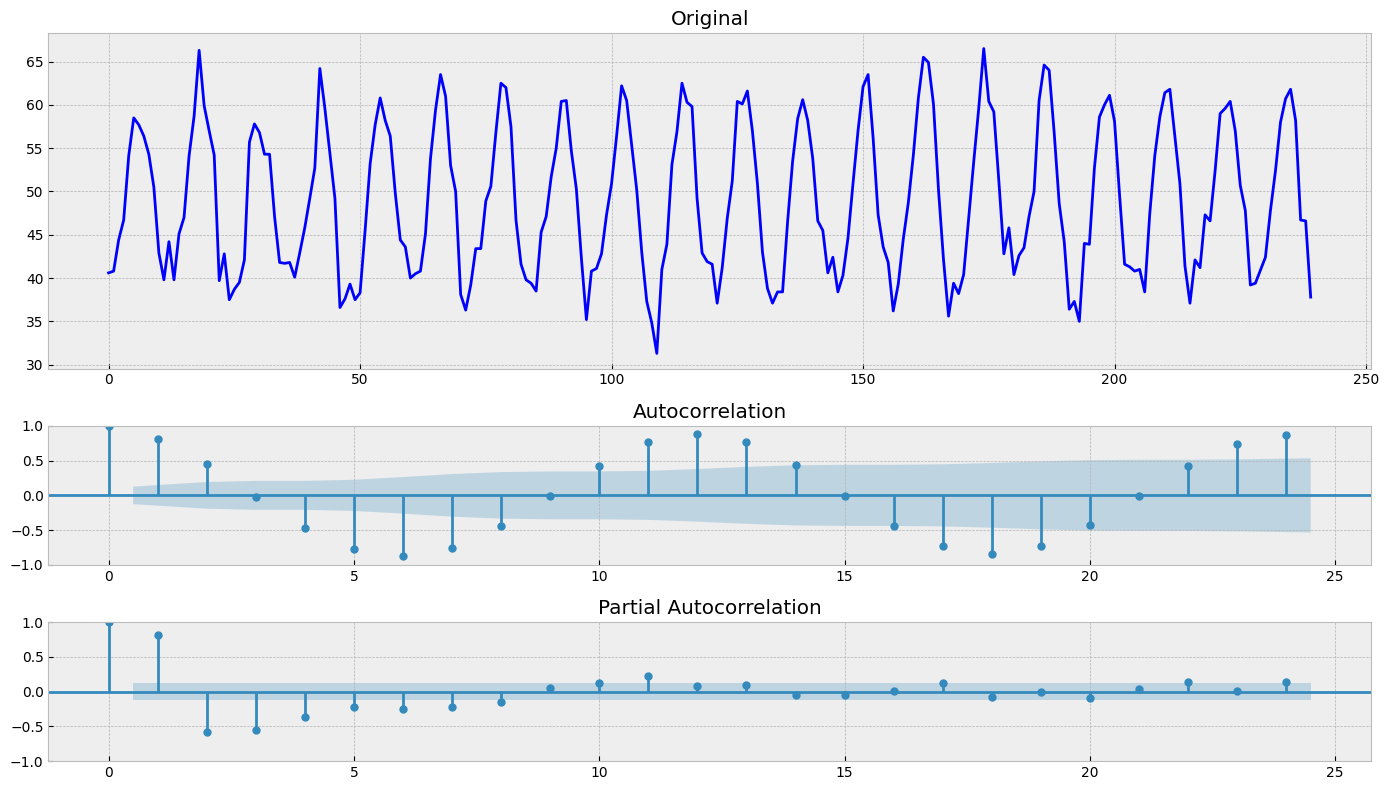

for Weekly closings of the Dow-Jones industrial average
Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


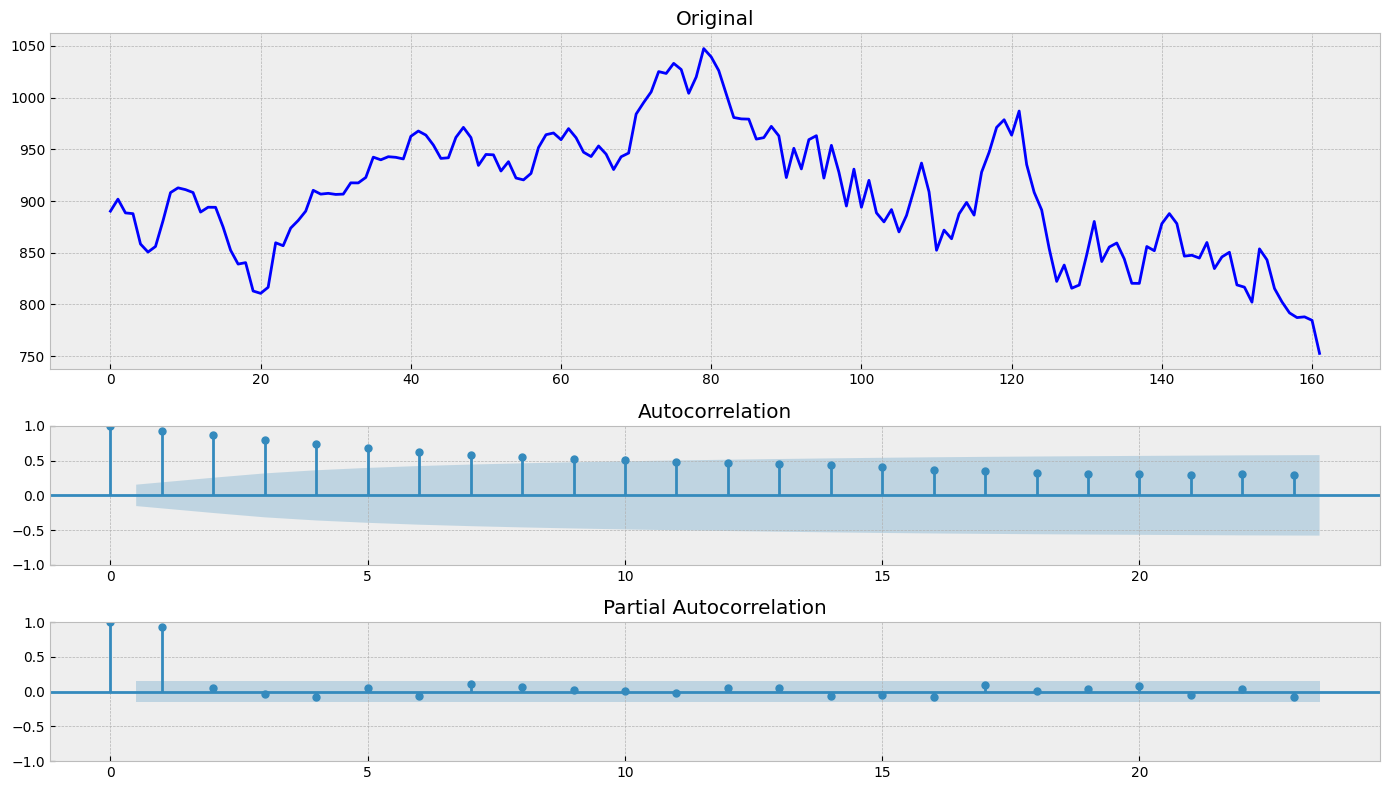

for Daily total female births in California
Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


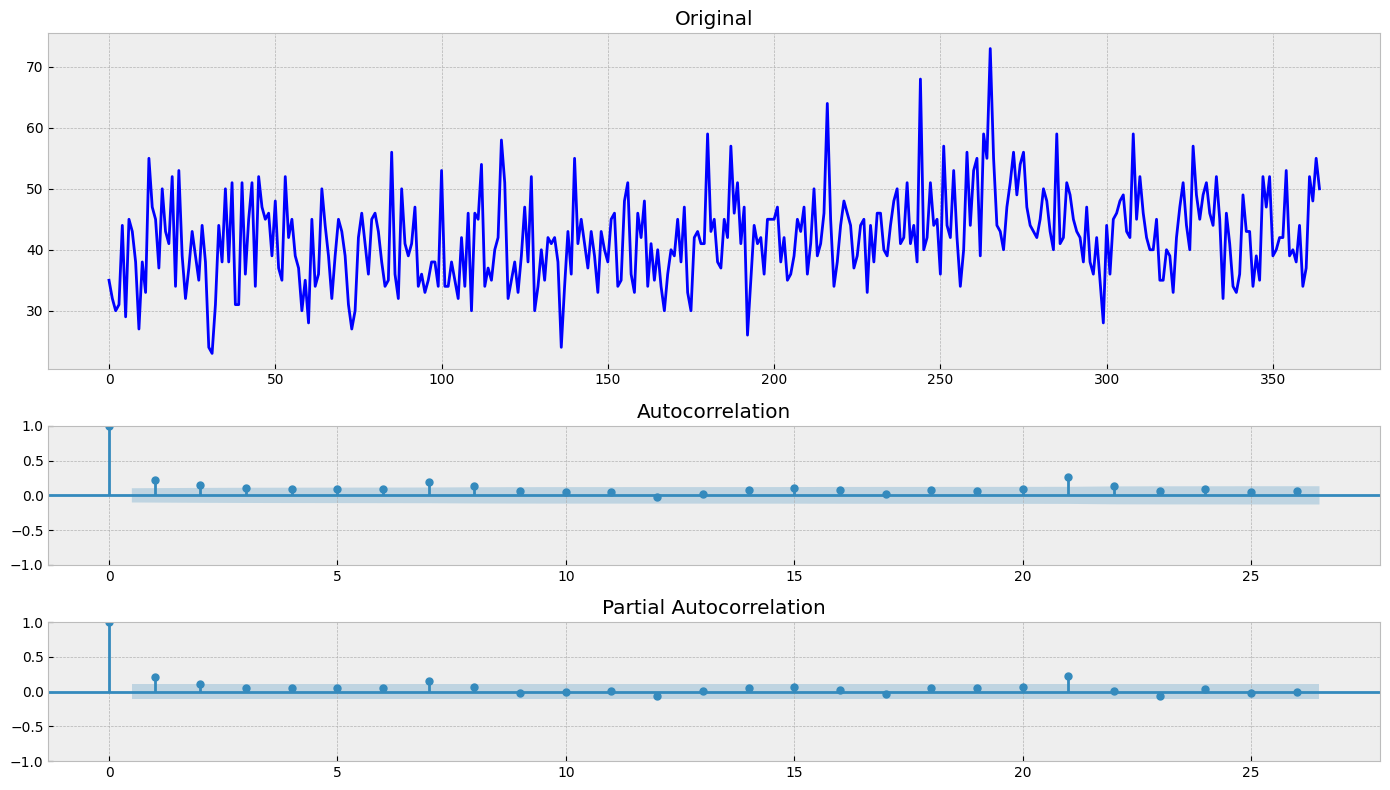

In [ ]:
for [key, value] in all_series.items():
  print(f'for {key}')
  test_stationarity(value)
  tsplot(value)

Для ряда Monthly sales of company X

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


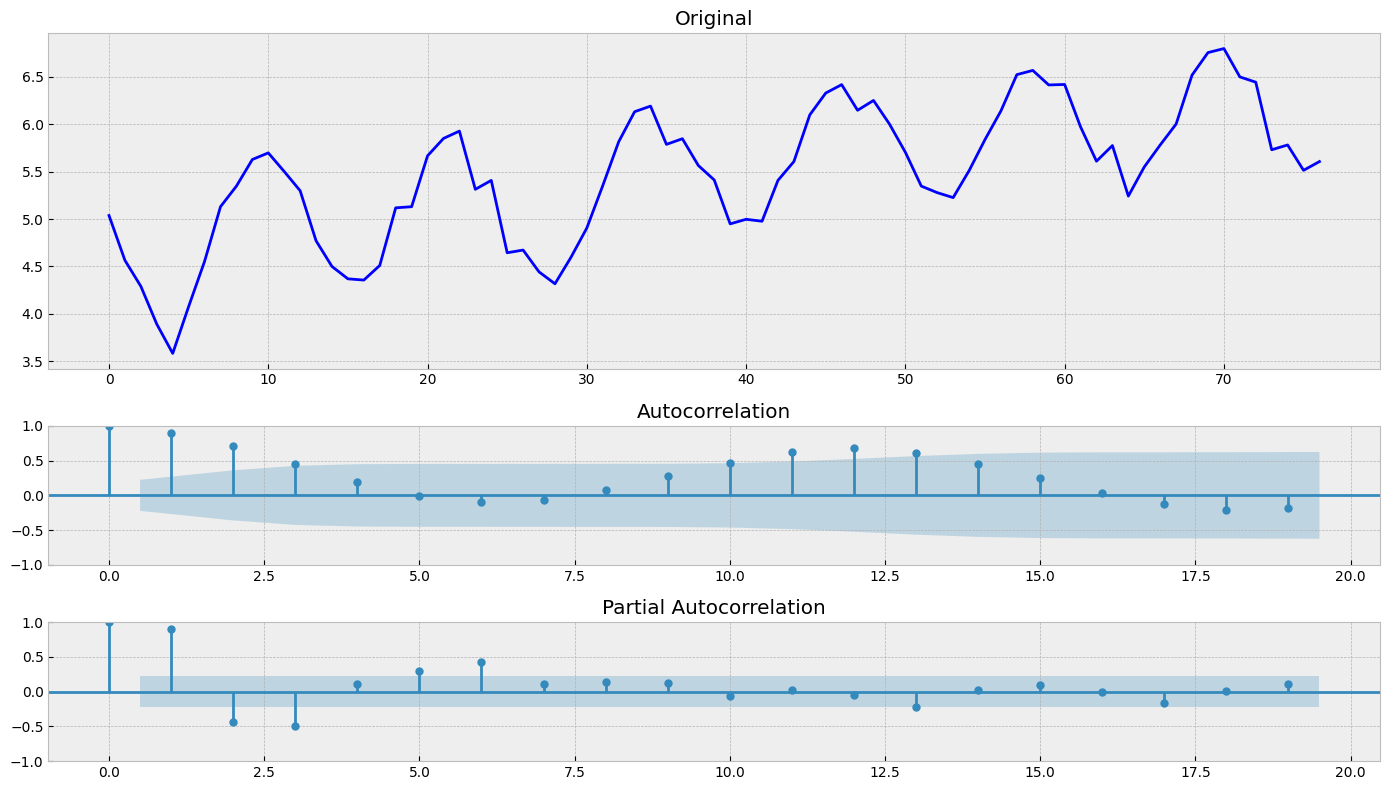

In [ ]:
#Преобразование Бокса-Кокса (избавление от изменения дисперсии)
all_series['Monthly sales of company X'] = boxcox(all_series['Monthly sales of company X'], 0)
test_stationarity(all_series['Monthly sales of company X'])
tsplot(all_series['Monthly sales of company X'])

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


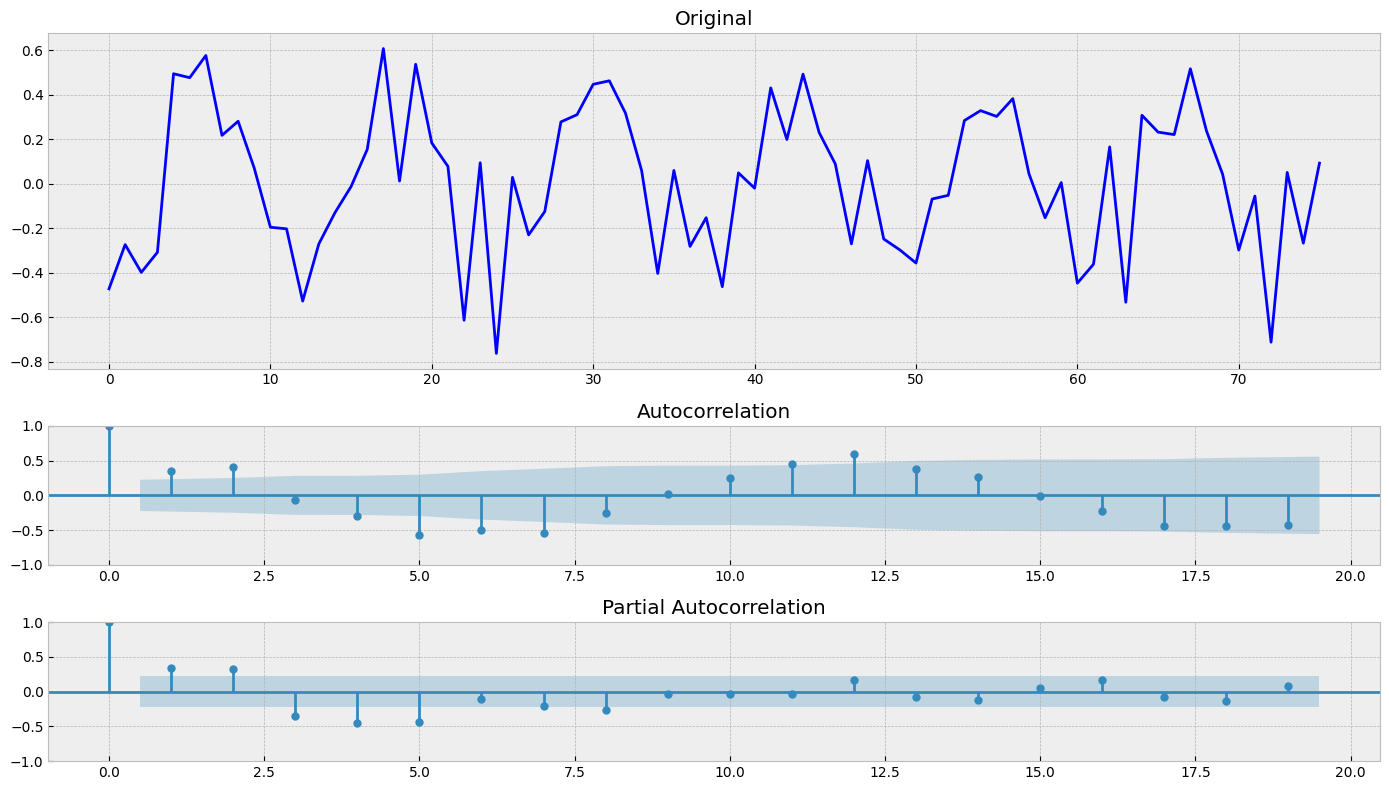

In [ ]:
#Дифференцирование - избавление от тренда
all_series['Monthly sales of company X'] = all_series['Monthly sales of company X'][1:] - all_series['Monthly sales of company X'][:-1]
test_stationarity(all_series['Monthly sales of company X'])
tsplot(all_series['Monthly sales of company X'])

Для ряда "Monthly Boston armed robberies"

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


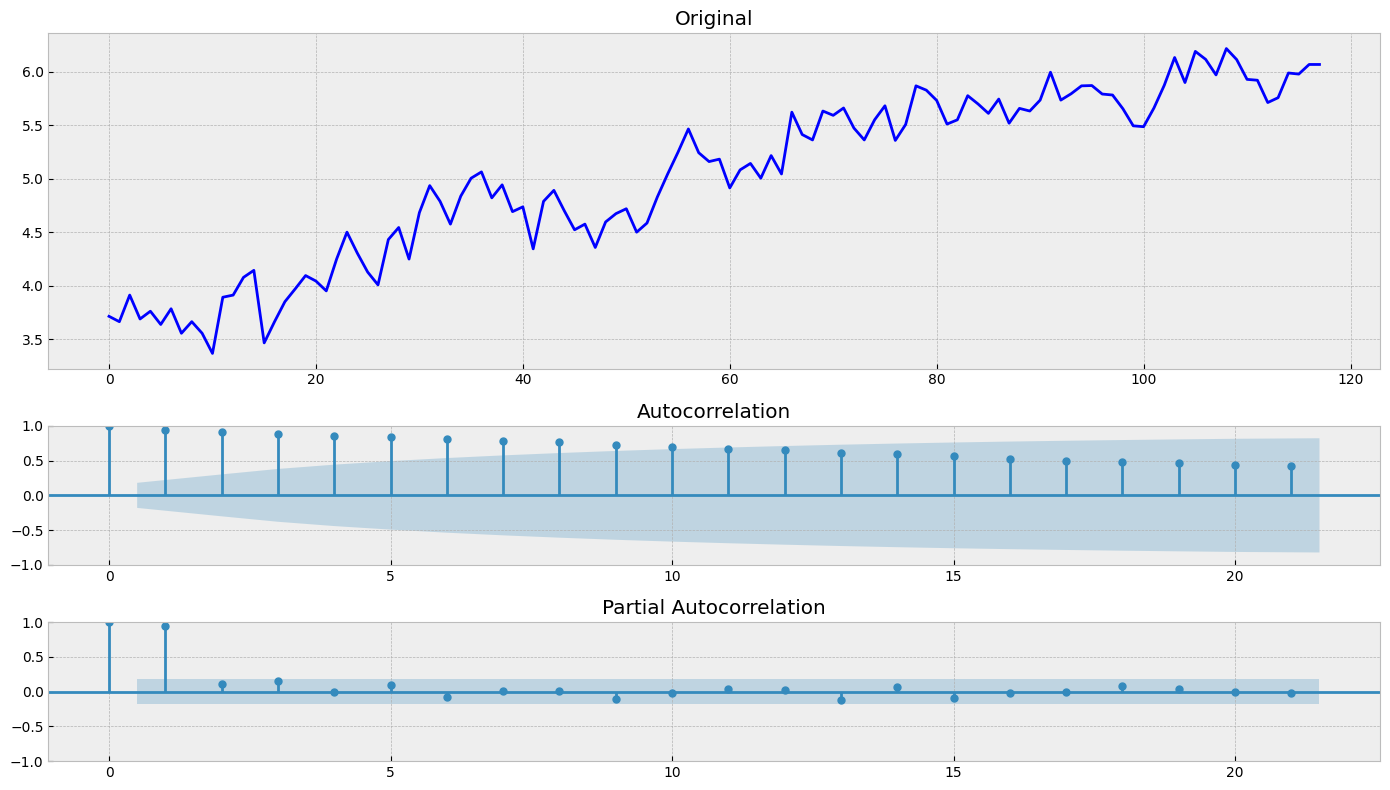

In [ ]:
#Преобразование Бокса-Кокса (избавление от изменения дисперсии)
all_series['Monthly Boston armed robberies'] = boxcox(all_series['Monthly Boston armed robberies'], 0)
test_stationarity(all_series['Monthly Boston armed robberies'])
tsplot(all_series['Monthly Boston armed robberies'])

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


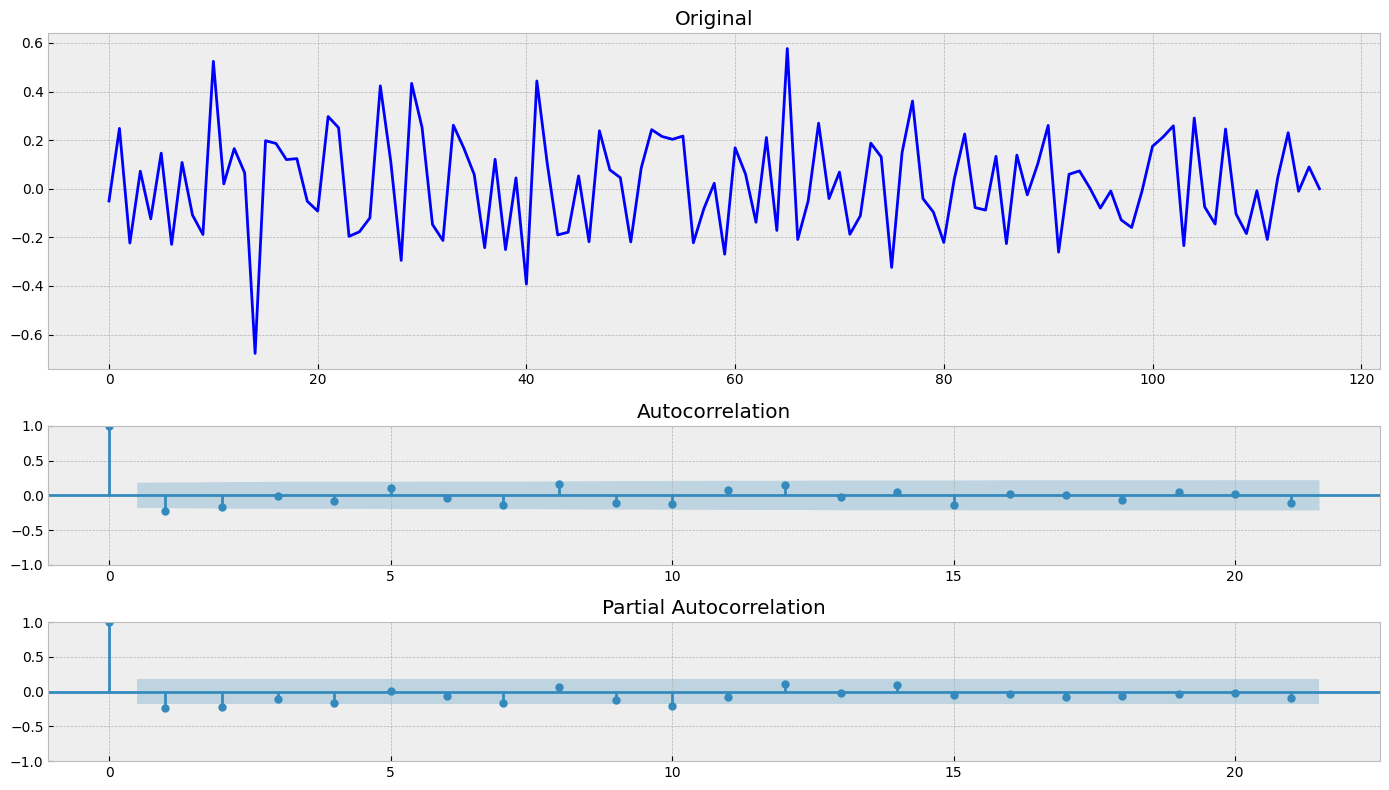

In [ ]:
#Дифференцирование - избавление от тренда
all_series['Monthly Boston armed robberies'] = all_series['Monthly Boston armed robberies'][1:] - all_series['Monthly Boston armed robberies'][:-1]
test_stationarity(all_series['Monthly Boston armed robberies'])
tsplot(all_series['Monthly Boston armed robberies'])

Для ряда "International airline passengers: monthly totals in thousands"

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


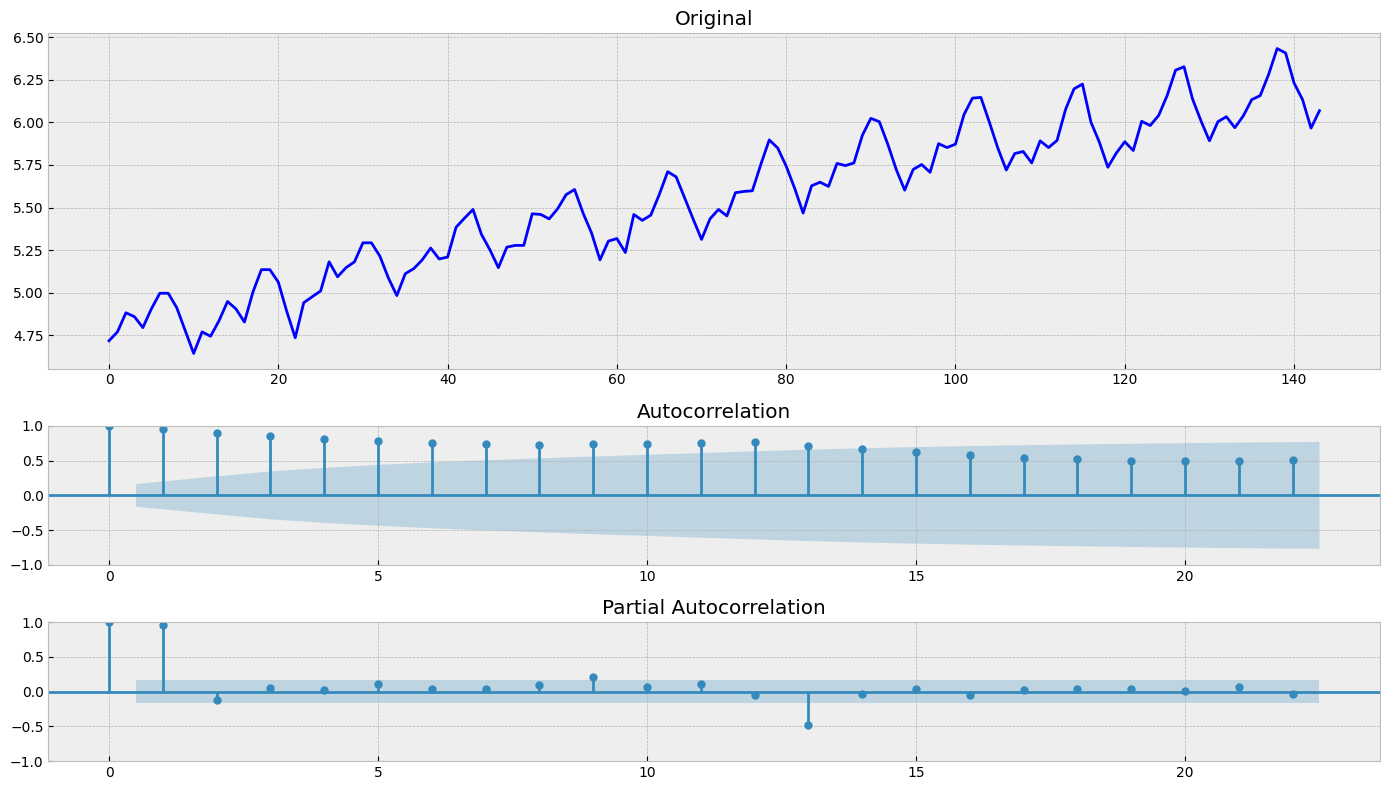

In [ ]:
#Преобразование Бокса-Кокса (избавление от изменения дисперсии)
all_series['International airline passengers: monthly totals in thousands'] = boxcox(all_series['International airline passengers: monthly totals in thousands'], 0)
test_stationarity(all_series['International airline passengers: monthly totals in thousands'])
tsplot(all_series['International airline passengers: monthly totals in thousands'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


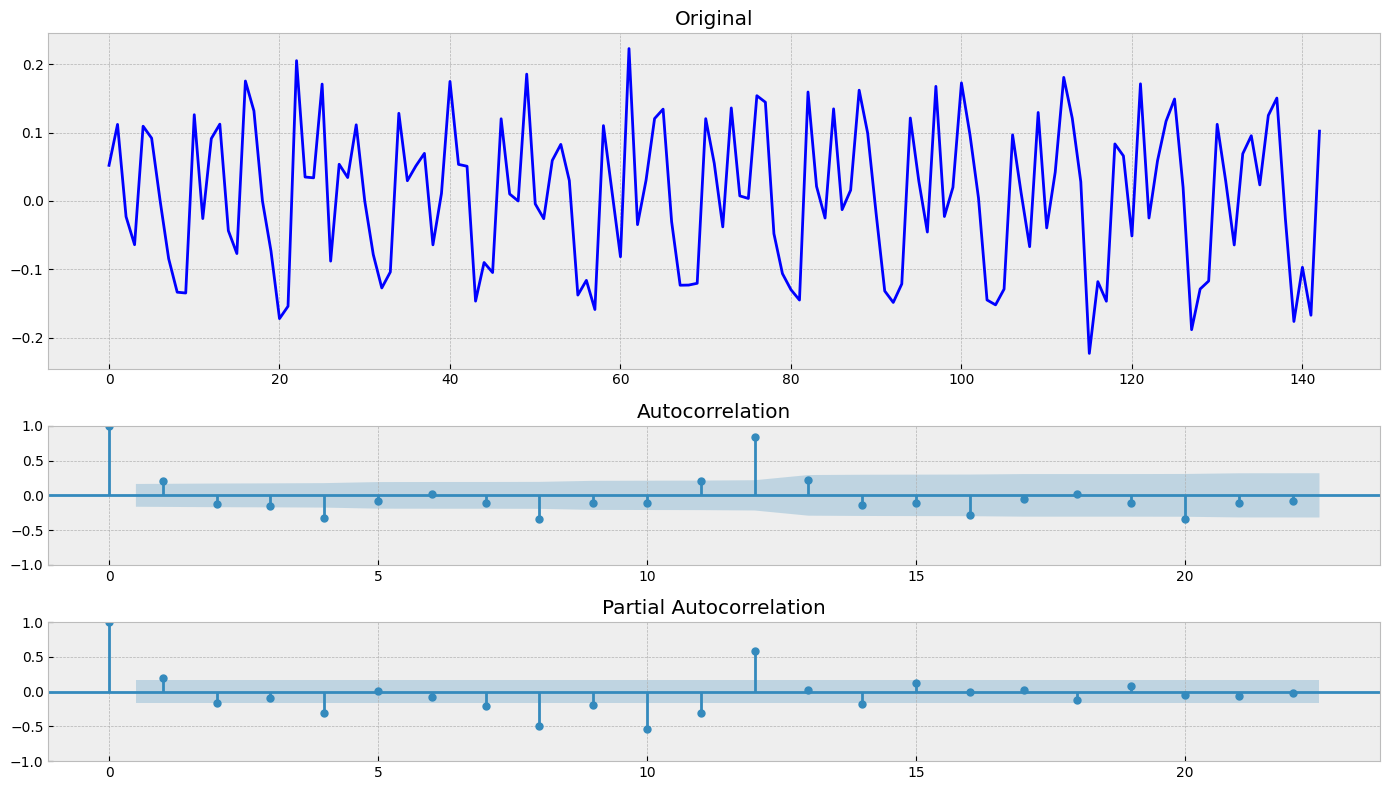

In [ ]:
#Дифференцирование - избавление от тренда
all_series['International airline passengers: monthly totals in thousands'] = all_series['International airline passengers: monthly totals in thousands'][1:] - all_series['International airline passengers: monthly totals in thousands'][:-1]
test_stationarity(all_series['International airline passengers: monthly totals in thousands'])
tsplot(all_series['International airline passengers: monthly totals in thousands'])

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


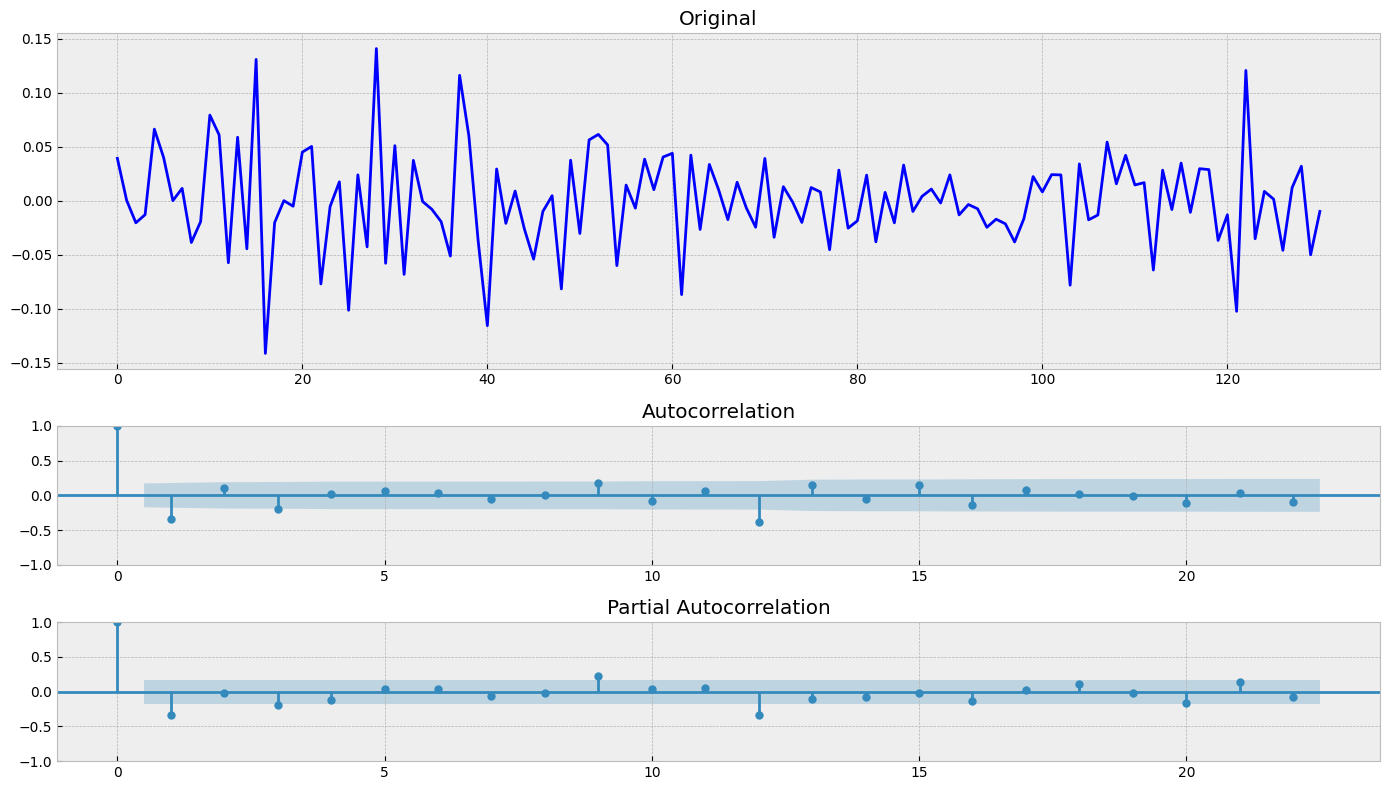

In [ ]:
#Наблюдаем пик сезонности на лаге 12 (см график выше). Применим сезонное дифференцирование
all_series['International airline passengers: monthly totals in thousands'] = all_series['International airline passengers: monthly totals in thousands'][12:] - all_series['International airline passengers: monthly totals in thousands'][:-12]
test_stationarity(all_series['International airline passengers: monthly totals in thousands'])
tsplot(all_series['International airline passengers: monthly totals in thousands'])

Ряд "Mean monthly air temperature (Deg. F) Nottingham Castle" и ряд "for Daily total female births in California"  - стационарны

Для ряда "Weekly closings of the Dow-Jones industrial average"

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


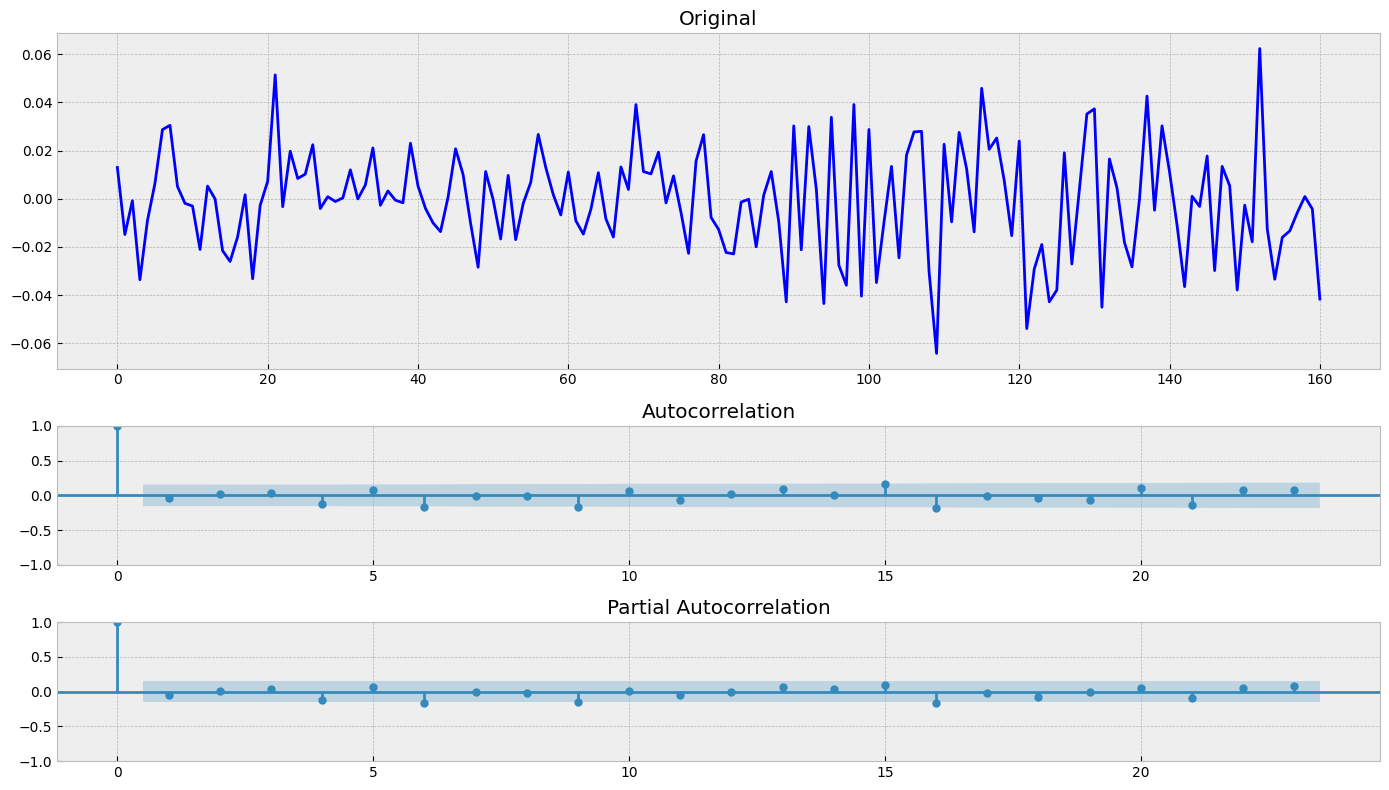

In [ ]:
#Преобразование Бокса-Кокса (избавление от изменения дисперсии) + дифференцирование
all_series['Weekly closings of the Dow-Jones industrial average'] = boxcox(all_series['Weekly closings of the Dow-Jones industrial average'], 0)
all_series['Weekly closings of the Dow-Jones industrial average'] = all_series['Weekly closings of the Dow-Jones industrial average'][1:] - all_series['Weekly closings of the Dow-Jones industrial average'][:-1]
test_stationarity(all_series['Weekly closings of the Dow-Jones industrial average'])
tsplot(all_series['Weekly closings of the Dow-Jones industrial average'])